In [1]:
# import requests
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

import time
import json
import requests
import numpy as np
import pandas as pd

import requests
from requests.auth import HTTPBasicAuth


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#credentials = json.loads(open('credentials.json').read())
#authentication = HTTPBasicAuth(credentials['username'], credentials['password'])

token = "dcb682143de4fecea72d275be29fb5f235d1c9de"

headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'PosterisIT',
        'Authorization': 'token ' + token
    }
)

In [3]:
data = requests.get('https://api.github.com/users/gsdenys', headers=headers)
data = data.json()
data

{'avatar_url': 'https://avatars.githubusercontent.com/u/7230611?v=4',
 'bio': None,
 'blog': 'https://www.linkedin.com/in/gsdenys/',
 'collaborators': 0,
 'company': 'Trademaster',
 'created_at': '2014-04-08T20:06:36Z',
 'disk_usage': 29223,
 'email': 'gsdenys@gmail.com',
 'events_url': 'https://api.github.com/users/gsdenys/events{/privacy}',
 'followers': 10,
 'followers_url': 'https://api.github.com/users/gsdenys/followers',
 'following': 7,
 'following_url': 'https://api.github.com/users/gsdenys/following{/other_user}',
 'gists_url': 'https://api.github.com/users/gsdenys/gists{/gist_id}',
 'gravatar_id': '',
 'hireable': True,
 'html_url': 'https://github.com/gsdenys',
 'id': 7230611,
 'location': 'São Paulo, SP, Brazil',
 'login': 'gsdenys',
 'name': 'Denys G. santos',
 'node_id': 'MDQ6VXNlcjcyMzA2MTE=',
 'organizations_url': 'https://api.github.com/users/gsdenys/orgs',
 'owned_private_repos': 1,
 'plan': {'collaborators': 0,
  'name': 'free',
  'private_repos': 10000,
  'space': 9

In [4]:
print("Name: {}".format(data['name']))
print("Email: {}".format(data['email']))
print("Location: {}".format(data['location']))
print("Public repos: {}".format(data['public_repos']))
print("Public gists: {}".format(data['public_gists']))
print("About: {}".format(data['bio']))

Name: Denys G. santos
Email: gsdenys@gmail.com
Location: São Paulo, SP, Brazil
Public repos: 30
Public gists: 1
About: None


In [5]:
#iterate over alll repositories
url = data['repos_url']
page_no = 1
repos_data = []

while (True):
    response = requests.get(url, headers=headers)
    response = response.json()
    repos_data = repos_data + response
    repos_fetched = len(response)
    print("Total repositories fetched: {}".format(repos_fetched))
    if (repos_fetched == 30):
        page_no = page_no + 1
        url = data['repos_url'] + '?page=' + str(page_no)
    else:
        break

Total repositories fetched: 30
Total repositories fetched: 0


In [6]:
repos_information = []
for i, repo in enumerate(repos_data):
    data = []
    data.append(repo['id'])
    data.append(repo['name'])
    data.append(repo['description'])
    data.append(repo['created_at'])
    data.append(repo['updated_at'])
    data.append(repo['owner']['login'])
    data.append(repo['license']['name'] if repo['license'] != None else None)
    data.append(repo['has_wiki'])
    data.append(repo['forks_count'])
    data.append(repo['open_issues_count'])
    data.append(repo['stargazers_count'])
    data.append(repo['watchers_count'])
    data.append(repo['url'])
    data.append(repo['commits_url'].split("{")[0])
    data.append(repo['url'] + '/languages')
    repos_information.append(data)

In [7]:
repos_df = pd.DataFrame(repos_information, columns = ['Id', 'Name', 'Description', 'Created on', 'Updated on', 
                                                      'Owner', 'License', 'Includes wiki', 'Forks count', 
                                                      'Issues count', 'Stars count', 'Watchers count',
                                                      'Repo URL', 'Commits URL', 'Languages URL'])


In [8]:
for i in range(repos_df.shape[0]):
#     time.sleep(2)
    response = requests.get(repos_df.loc[i, 'Languages URL'], headers=headers)
    response = response.json()
#     print(i, response)
    if response != {}:
        languages = []
        for key, value in response.items():
            languages.append(key)
        languages = ', '.join(languages)
        repos_df.loc[i, 'Languages'] = languages
    else:
        repos_df.loc[i, 'Languages'] = ""
        
# repos_df.to_csv('repos_info.csv', index = False)

In [9]:
repos_df

,Id,Name,Description,Created on,Updated on,Owner,License,Includes wiki,Forks count,Issues count,Stars count,Watchers count,Repo URL,Commits URL,Languages URL,Languages
0,50627775,alf-db-constraint,Database constraint to Alfresco Document Type,2016-01-29T01:27:23Z,2017-08-09T11:32:25Z,gsdenys,GNU Lesser General Public License v2.1,True,0,0,4,4,https://api.github.com/repos/gsdenys/alf-db-co...,https://api.github.com/repos/gsdenys/alf-db-co...,https://api.github.com/repos/gsdenys/alf-db-co...,"Java, Batchfile, Shell"
1,39864719,alfresco-bulk-export,Automatically exported from code.google.com/p/...,2015-07-29T00:36:35Z,2019-09-19T11:17:25Z,gsdenys,GNU Lesser General Public License v3.0,False,32,17,11,11,https://api.github.com/repos/gsdenys/alfresco-...,https://api.github.com/repos/gsdenys/alfresco-...,https://api.github.com/repos/gsdenys/alfresco-...,Java
2,197203698,amqp-client,Lua Client for AMQP,2019-07-16T13:52:44Z,2020-09-27T09:41:13Z,gsdenys,Apache License 2.0,True,7,6,5,5,https://api.github.com/repos/gsdenys/amqp-client,https://api.github.com/repos/gsdenys/amqp-clie...,https://api.github.com/repos/gsdenys/amqp-clie...,Lua
3,241175035,bpm-engine,Event drive engine for BPMN,2020-02-17T18:07:22Z,2020-02-17T18:23:29Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/bpm-engine,https://api.github.com/repos/gsdenys/bpm-engin...,https://api.github.com/repos/gsdenys/bpm-engin...,Go
4,27539722,cmis-java-sample,Breve exemplo de ações usando OpenCMIS,2014-12-04T12:35:44Z,2015-03-23T14:09:08Z,gsdenys,None,True,0,0,1,1,https://api.github.com/repos/gsdenys/cmis-java...,https://api.github.com/repos/gsdenys/cmis-java...,https://api.github.com/repos/gsdenys/cmis-java...,Java
5,76353813,cmis-persistence-api,The CMIS Persistence API to help java programe...,2016-12-13T11:45:29Z,2016-12-13T11:49:08Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/cmis-pers...,https://api.github.com/repos/gsdenys/cmis-pers...,https://api.github.com/repos/gsdenys/cmis-pers...,Java
6,77284208,cmis-sample-test-case,A simple test using JUnit Runner for CMIS Server,2016-12-24T13:27:12Z,2016-12-24T13:27:31Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/cmis-samp...,https://api.github.com/repos/gsdenys/cmis-samp...,https://api.github.com/repos/gsdenys/cmis-samp...,"Shell, Batchfile, Java"
7,326848081,config,Configuration Library,2021-01-05T01:02:55Z,2021-01-05T01:02:57Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/config,https://api.github.com/repos/gsdenys/config/co...,https://api.github.com/repos/gsdenys/config/la...,Go
8,108839965,content-store,First commit,2017-10-30T11:12:57Z,2017-10-30T11:13:56Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/content-s...,https://api.github.com/repos/gsdenys/content-s...,https://api.github.com/repos/gsdenys/content-s...,"Python, Shell"
9,99453822,content-store-common,The API to help implement content persistence ...,2017-08-05T23:47:14Z,2017-11-28T16:25:12Z,gsdenys,Apache License 2.0,True,0,0,0,0,https://api.github.com/repos/gsdenys/content-s...,https://api.github.com/repos/gsdenys/content-s...,https://api.github.com/repos/gsdenys/content-s...,Java


### commits

In [10]:
commits_information = []
for i in range(repos_df.shape[0]):
    url = repos_df.loc[i, 'Commits URL']
    page_no = 1
    while (True):
        response = requests.get(url, headers=headers)
        response = response.json()
#         print("URL: {}, commits: {}".format(url, len(response)))
        for commit in response:
            commit_data = []
            commit_data.append(repos_df.loc[i, 'Id'])
            commit_data.append(commit['sha'])
            commit_data.append(commit['commit']['committer']['date'])
            commit_data.append(commit['commit']['message'])
            commits_information.append(commit_data)
        if (len(response) == 30):
            page_no = page_no + 1
            url = repos_df.loc[i, 'Commits URL'] + '?page=' + str(page_no)
        else:
            break
            
commits_df = pd.DataFrame(commits_information, columns = ['Repo Id', 'Commit Id', 'Date', 'Message'])
# commits_df.to_csv('commits_info.csv', index = False)

## Analisys

In [11]:
repos = repos_df
commits = commits_df

In [12]:
print("Total repos till date: {}".format(repos.shape[0]))
print("Total commits till date: {}".format(commits.shape[0]))

Total repos till date: 30
Total commits till date: 1460


In [13]:
repos.describe()

,Id,Forks count,Issues count,Stars count,Watchers count
count,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,1.881375e+08,1.733333,1.366667,0.966667,0.966667
std,1.001792e+08,6.016835,3.718392,2.311640,2.311640
min,2.753972e+07,0.000000,0.000000,0.000000,0.000000
25%,1.018004e+08,0.000000,0.000000,0.000000,0.000000
50%,1.873704e+08,0.000000,0.000000,0.000000,0.000000
75%,2.790540e+08,0.000000,0.000000,0.750000,0.750000
max,3.291782e+08,32.000000,17.000000,11.000000,11.000000


In [14]:
print("Two most common commit messages: {}".format(' and '.join(commits['Message'].value_counts().index[:2])))

Two most common commit messages: Update README.md and dev


In [15]:
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())
commits_count.columns = ['Id', 'Commits count']

In [16]:
repos = pd.merge(repos, commits_count, on = 'Id')

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits per repository')

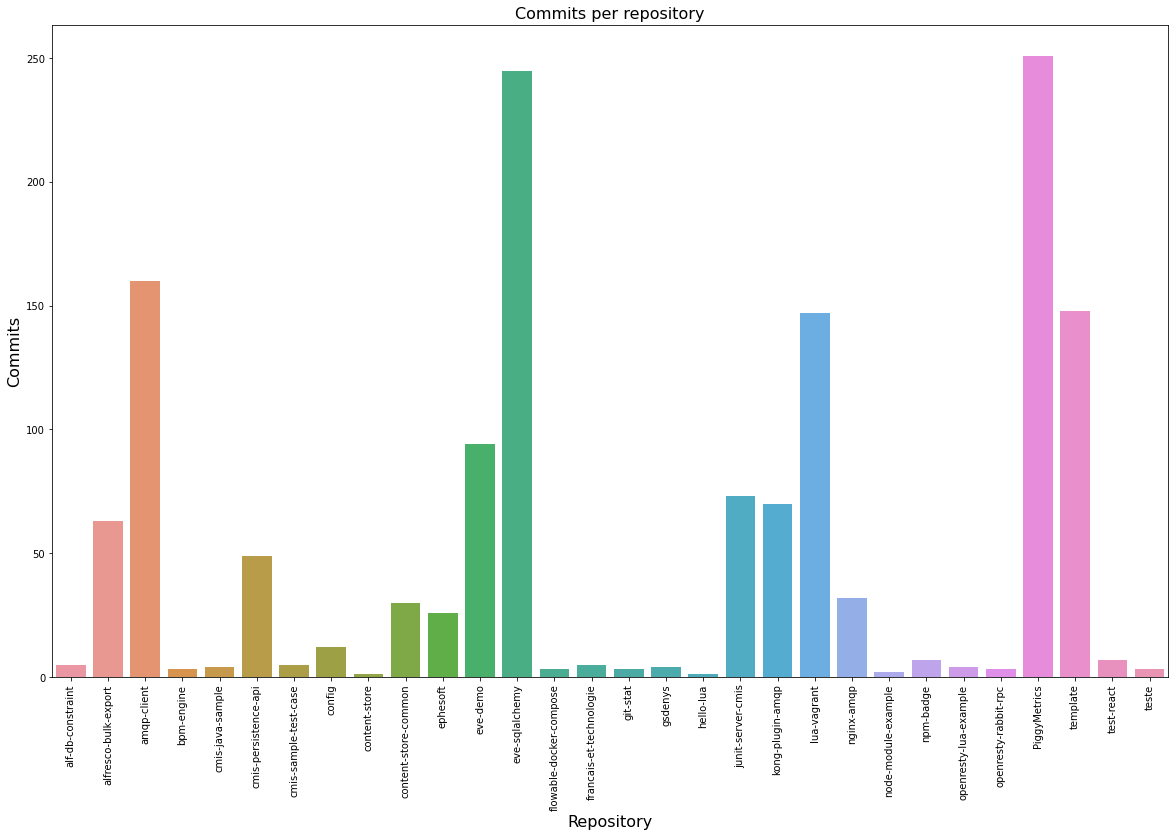

In [17]:
plt.figure(figsize = (20, 12))
sns.barplot(repos['Name'], repos['Commits count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

In [18]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in each year')

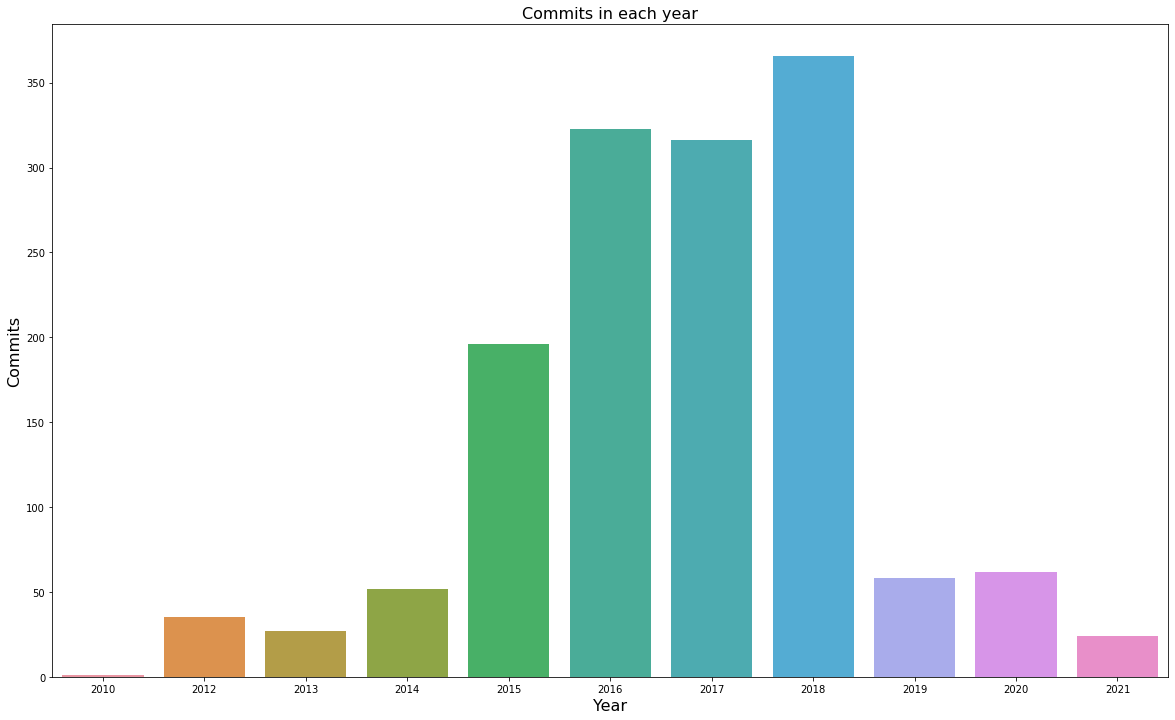

In [19]:
plt.figure(figsize = (20, 12))
sns.barplot(yearly_stats.index, yearly_stats.values)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each year", fontsize = 16)

In [20]:
commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == '2018'].groupby('Month').count()['Commit Id']

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in each month of 2019')

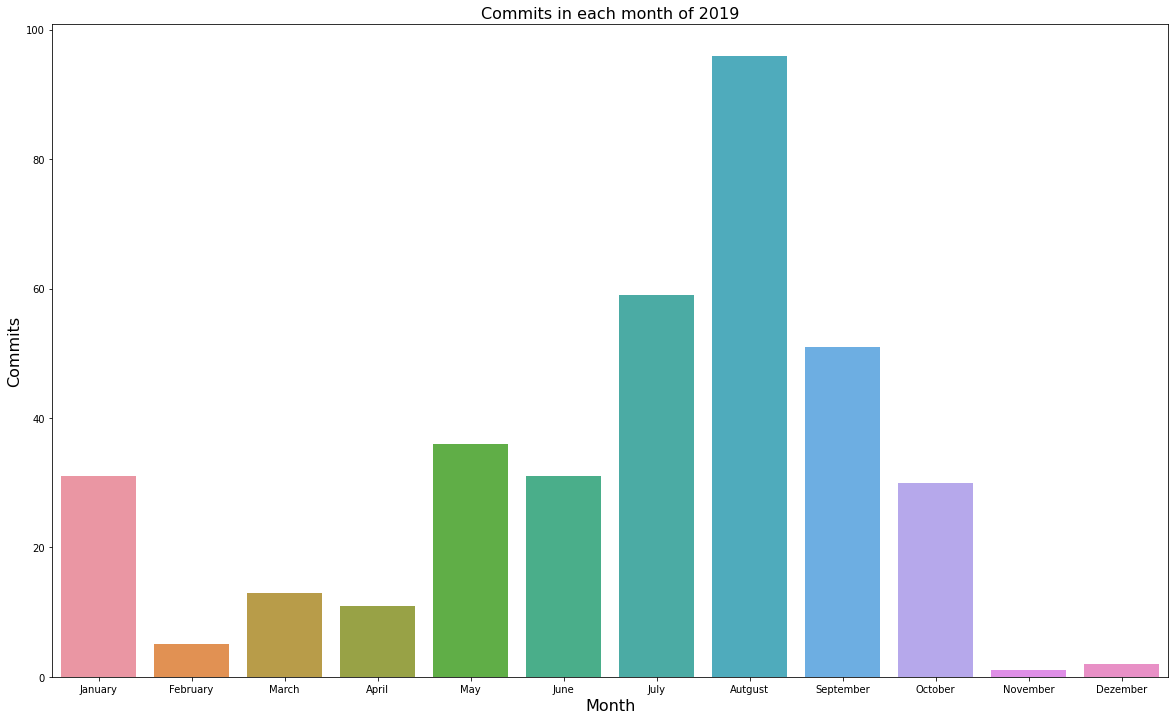

In [21]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June', '07': 'July', '08': 'Autgust', '09': 'September','10': 'October', '11':'November', '12': 'Dezember'}
labels = []
for value in monthly_stats.index:
    labels.append(month_mapper[value])

plt.figure(figsize = (20, 12))
plot = sns.barplot(monthly_stats.index, monthly_stats.values)
plt.xlabel("Month", fontsize = 16)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each month of 2019", fontsize = 16)

In [22]:
commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == '2018')
                       & (commits['Month'] == '10')]['Date only'].value_counts().sort_index()

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Commits in March, 2019')

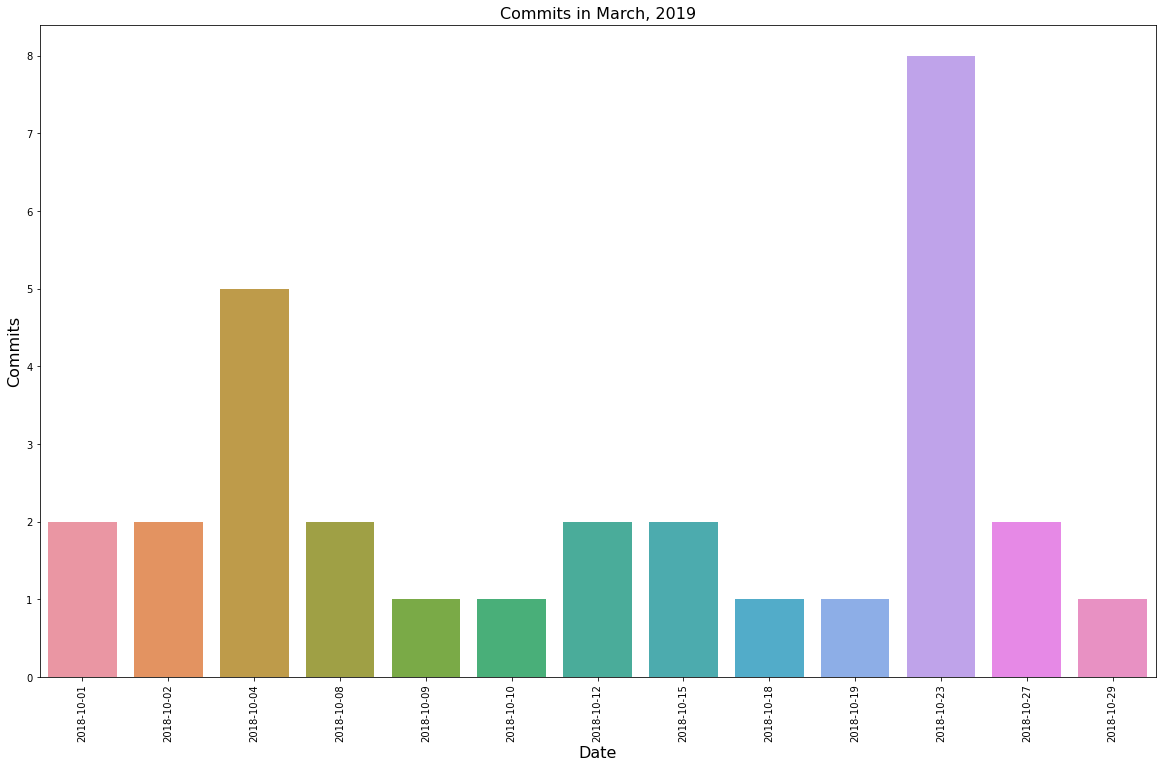

In [23]:
labels = []
for value in commit_stats.index:
    labels.append(value.date())
    
plt.figure(figsize = (20, 12))
plot = sns.barplot(commit_stats.index, commit_stats.values)
plt.xlabel("Date", fontsize = 16)
plt.xticks(rotation = 90)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in March, 2019", fontsize = 16)

## Language

In [24]:
list_of_languages = []
for languages in repos['Languages']:
    if type(languages) == str:
        for language in languages.split(','):
            list_of_languages.append(language.strip())

/home/gsdenys/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Language distribution amongst all repositories')

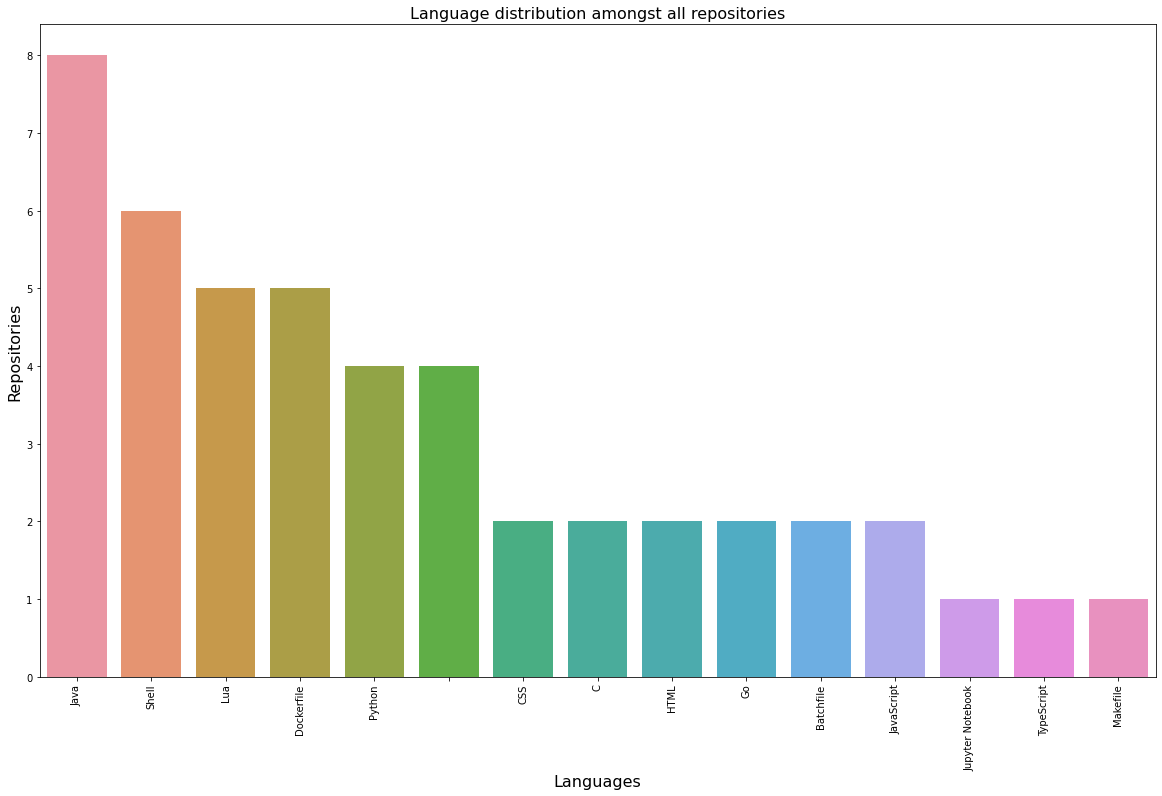

In [25]:
languages_count = pd.Series(list_of_languages).value_counts()

plt.figure(figsize = (20, 12))
sns.barplot(languages_count.index, languages_count.values)
plt.xlabel("Languages", fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel("Repositories", fontsize = 16)
plt.title("Language distribution amongst all repositories", fontsize = 16)